<a href="https://colab.research.google.com/github/JoshiDeepak08/Machine_learning/blob/main/real_estate_predic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('data.csv')

In [ ]:
data.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


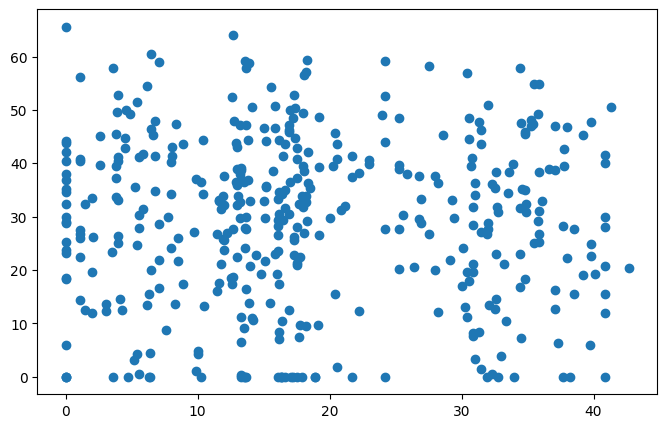

In [ ]:
plt.figure(figsize=(8,5))

plt.scatter(data['House age'], data['House price of unit area'])
plt.xlabel=("House age")
plt.ylabel=("house price")

In [ ]:
x= data[['Distance to the nearest MRT station','Number of convenience stores','Latitude','Longitude']]
y= data['House price of unit area']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2, random_state= 42)

In [ ]:
clf = LinearRegression()
clf.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
# from sklearn.metrics import accuracy_score
# # accuracy_score(y_test, y_pred)
# y_pred

In [ ]:
import gradio as gr

In [ ]:
def predict_price(distance, stores, latitude, longitude):
    """
    Predict the house price based on input features.

    Args:
        distance (float): Distance to the nearest MRT station.
        stores (int): Number of convenience stores.
        latitude (float): Latitude of the house.
        longitude (float): Longitude of the house.

    Returns:
        float: Predicted house price.
    """
    input_data = pd.DataFrame({
        'Distance to the nearest MRT station': [distance],
        'Number of convenience stores': [stores],
        'Latitude': [latitude],
        'Longitude': [longitude]
    })
    prediction = clf.predict(input_data)
    return prediction[0]


In [ ]:
inputs = [
    gr.Number(label="Distance to the nearest MRT station"),
    gr.Number(label="Number of convenience stores"),
    gr.Number(label="Latitude"),
    gr.Number(label="Longitude")
]

output = gr.Textbox(label="Predicted House Price per unit area")

interface = gr.Interface(fn=predict_price, inputs=inputs, outputs=output, title="House Price Prediction")

# Launch the Gradio app
if __name__ == "__main__":
    interface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7a993522cef111c07b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
